In [ ]:
import pandas as pd 
import numpy as np

# Introduction 

As data scientists we spend a lot of time tidying datasets, converting datasets into appropriate formats, unnest data, handle multi level indexed dataframes, etc.


In [ ]:
fifa = pd.read_csv('../data/players_20.csv')
fifa

In [ ]:
fifa.shape

This dataframe is in **wide format** where each row represents an observation and each column a feature. In the **long format** each row corresponds to a value of a feature, including identifier of the observation and feature.
The long format is closer to the tidy standard

In [ ]:
# Set name as index
fifa_transpose = fifa.set_index('sofifa_id')[['height_cm', 'weight_kg']].transpose()

# Print fifa_transpose
print(fifa_transpose)

# Pivot Method 

The pandas dataframe *.pivot()* method allows us to go from a long to a wide format. It expects 3 arguments: 
- **index**: the column we would like to have as an index in the output dataframe
- **columns**: name of the column to be used to name the new columns in the new dataframe
- **values**: columns whose values will populate the output dataframe 
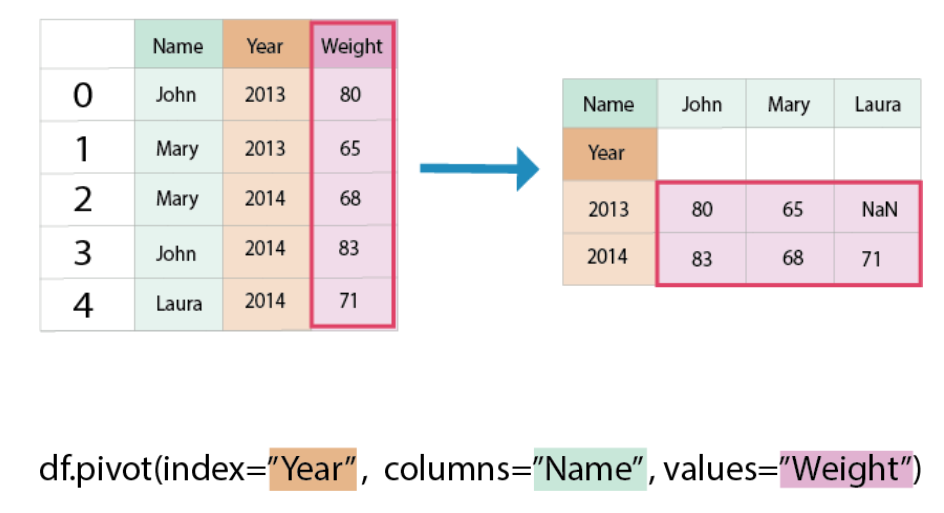

Passing an array of column names as index will make the pivot table multiindexed. Values can be an array too.

# Pivot or Pivot_table? 

- If our dataframe as more than one value for each index/column pair, 
or 
- If if we need a multiindexed dataframe
- or
- If we need summary statistics of our large dataframe

then, go for pivot_table 

The margins parameter adds marginal information to the output dataframe (aggfunc for each row and column).



In [ ]:
fifa_transpose

# Reshaping with Melt 

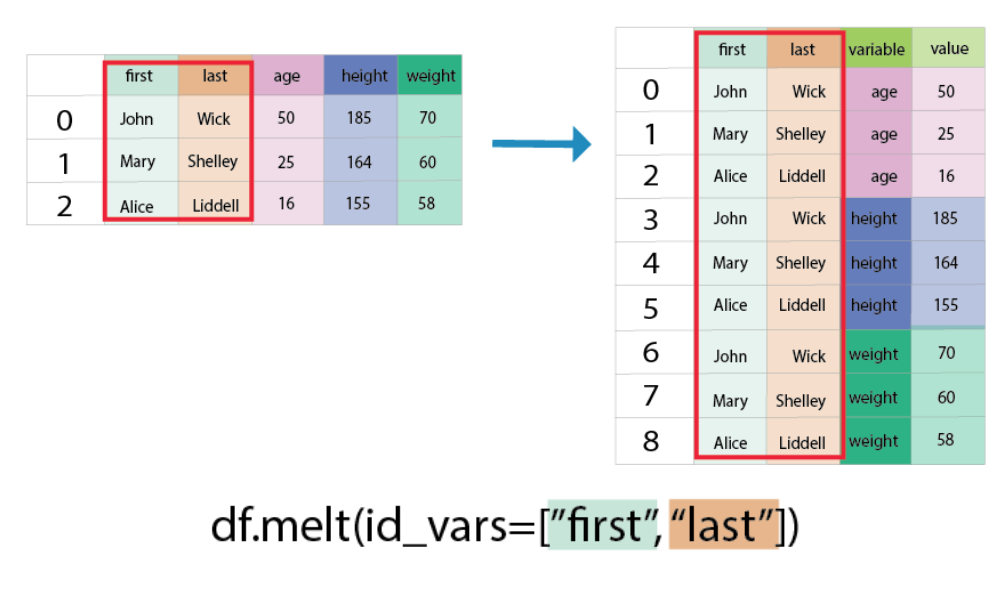

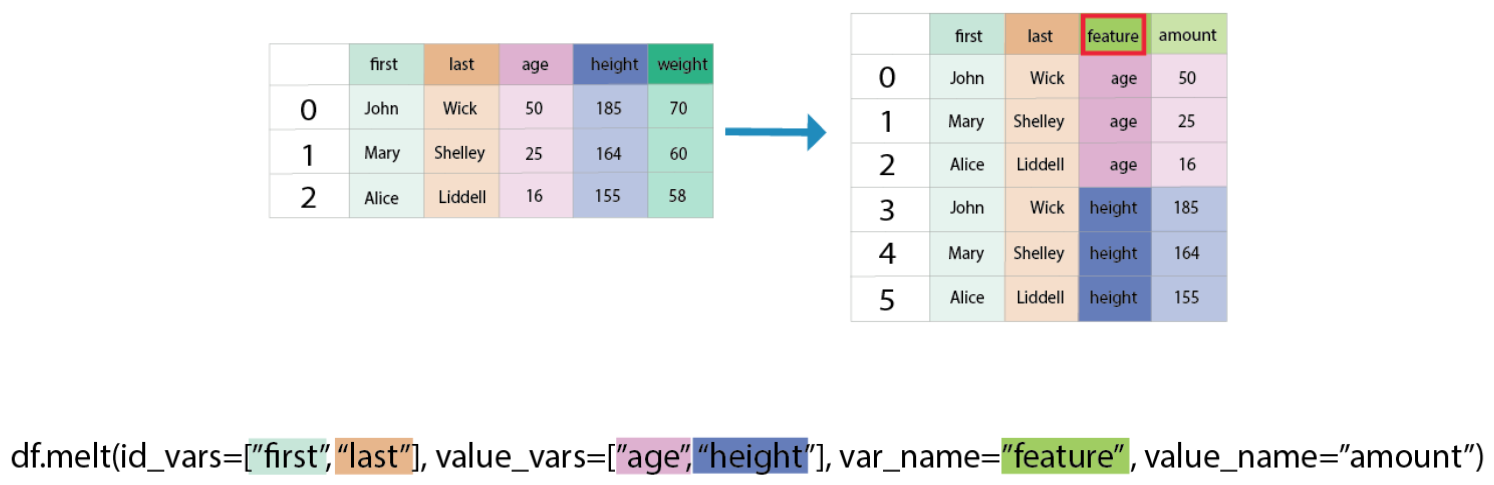


In [ ]:
books = pd.read_csv('../data/books_small.csv')
books.head()

In [ ]:
books_melted= books.melt(id_vars='title', value_vars=['language_code', 'ratings_count'])
books_melted.head(5)

# Wide to long transformation 

The pandas *pd.wide_to_long()* method does that

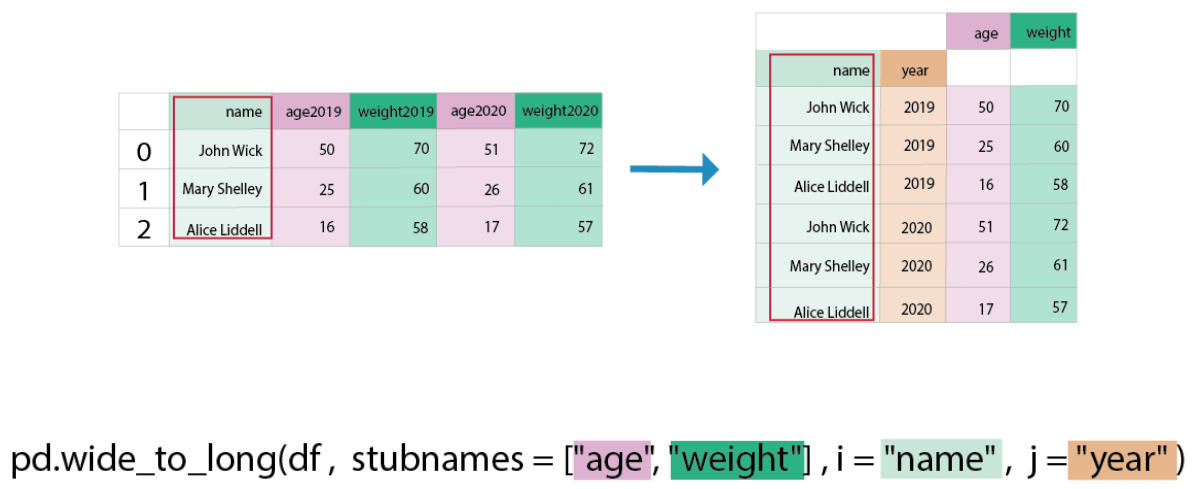

In [ ]:
books.head()

The wide_to_long method doesnt keep the previous index of the dataframe, so if you want to keep it you have to reset_index to convert the index to a regular column and then, add it to the *i* parameter to be part of the multiindex of the output dataframe 

There is a *sep* parameter to indicate if there is a separator between the stubname and the value (numbers expected). When the values are non numeric, we can make use of the *suffix* parameter, a regexp to capture the value.

# Working with String columns

In [ ]:
books.head()

operations like .str.cat or .str.split

# MultiIndexes

In [ ]:
data = {
    'credit_score': [619, 608, 502],
    'age': [43, 34, 23],
    'country': ['France', 'Germany', 'France'],
    'num_products': [1, 0, 1],
    'exited': ['Yes', 'No', 'Yes']
}

df = pd.DataFrame(data)
df.head()

In [ ]:
df.set_index(['country', 'age'], inplace=True)
df

In [ ]:
new_array = [['yes', 'no', 'yes'], ['no', 'yes', 'yes']]

In [ ]:
df.index = pd.MultiIndex.from_arrays(new_array, names=['member', 'credit_card'])
df

In [ ]:
index = pd.MultiIndex.from_arrays(
    [['Wick', 'Wick', 'Shelley', 'Shelley'], ['John', 'Julien', 'Mary', 'Frank']],
    names=['last', 'first']
)

# Defining the MultiIndex for the columns
columns = pd.MultiIndex.from_arrays(
    [['2019', '2019', '2020', '2020'], ['age', 'weight', 'age', 'weight']],
    names=['year', 'feature']
)

data = [
    [30, 75, 31, 78],  # Wick, John
    [29, 80, 30, 82],  # Wick, Julien
    [40, 60, 41, 62],  # Shelley, Mary
    [38, 85, 39, 88],  # Shelley, Frank
]

# Creating the DataFrame
patients = pd.DataFrame(data, index=index, columns=columns)

patients.head()

# Stacking

In [ ]:
data = {
    'credit_score': [619, 608, 502],
    'age': [43, 34, 23],
    'country': ['France', 'Germany', 'France'],
    'num_products': [1, 0, 1],
    'exited': ['Yes', 'No', 'Yes']
}

df = pd.DataFrame(data)
df.index = pd.MultiIndex.from_arrays(new_array, names=['member', 'credit_card'])
df

In [ ]:
df_stacked = df.stack() 
df_stacked

In [ ]:
patients

In [ ]:
patients.stack() 


In [ ]:
patients.stack(level='year') 